In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

1) Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе)

2) Сгенерируйте из него выборку объёма 1000

3) постройте гистограмму выборки 

4) нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

In [243]:
exp = sts.expon()
# мое любимое непрерывное распределение


In [244]:
r = exp.rvs(size=1000)


In [245]:
x = np.linspace(exp.ppf(0.01), exp.ppf(0.99), 1000)

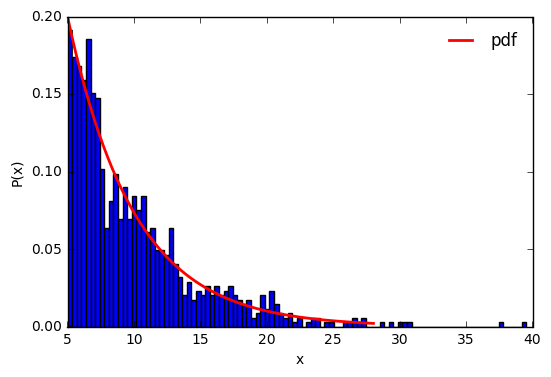

In [246]:
plt.hist(r, bins = 100, normed=True, histtype='bar')
plt.plot(x, exp.pdf(x), 'k-', color = 'r', lw=2, label='pdf')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel("P(x)")
plt.show()



1) n = 5/10/50/100

2) для каждого n по 1000 выборок

3) гистограммы распределений выборочных средних

4) найти теоретические среднее и дисперсию моей случайной величины

5) Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (!нужна сигма!)

функция плотности: expon.pdf(x) = exp(-x)
 => параметр lambda = 1

тогда:

1) мат. ожидание = lambda^(-1) = 1

2) дисперсия = lambda^(-2) = 1, sigma = 1

Источники:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

https://en.wikipedia.org/wiki/Exponential_distribution

In [247]:
#списки для средних значений, четыре группы
five =[]
ten = []
fifty =[]
hundred = []

for i in range(1,1001):
    five.append(np.mean(exp.rvs(size=5)))

for i in range(1,1001):
    ten.append(np.mean(exp.rvs(size=10)))

for i in range(1,1001):
    fifty.append(np.mean(exp.rvs(size=50)))
    
for i in range(1,1001):
    hundred.append(np.mean(exp.rvs(size=100)))

In [248]:
def norm_pdf(mu, sigma):
    norm = sts.norm(loc = mu, scale = sigma)
    n = np.linspace(0,4,100)
    pdf = norm.pdf(n)
    plt.plot(n, pdf, color = 'r')

In [249]:
def hist(sample_mean_list):
    plt.hist(sample_mean_list, bins = 100, normed=True, histtype='bar')
    plt.xlabel('x')
    plt.ylabel("P(x)")
    

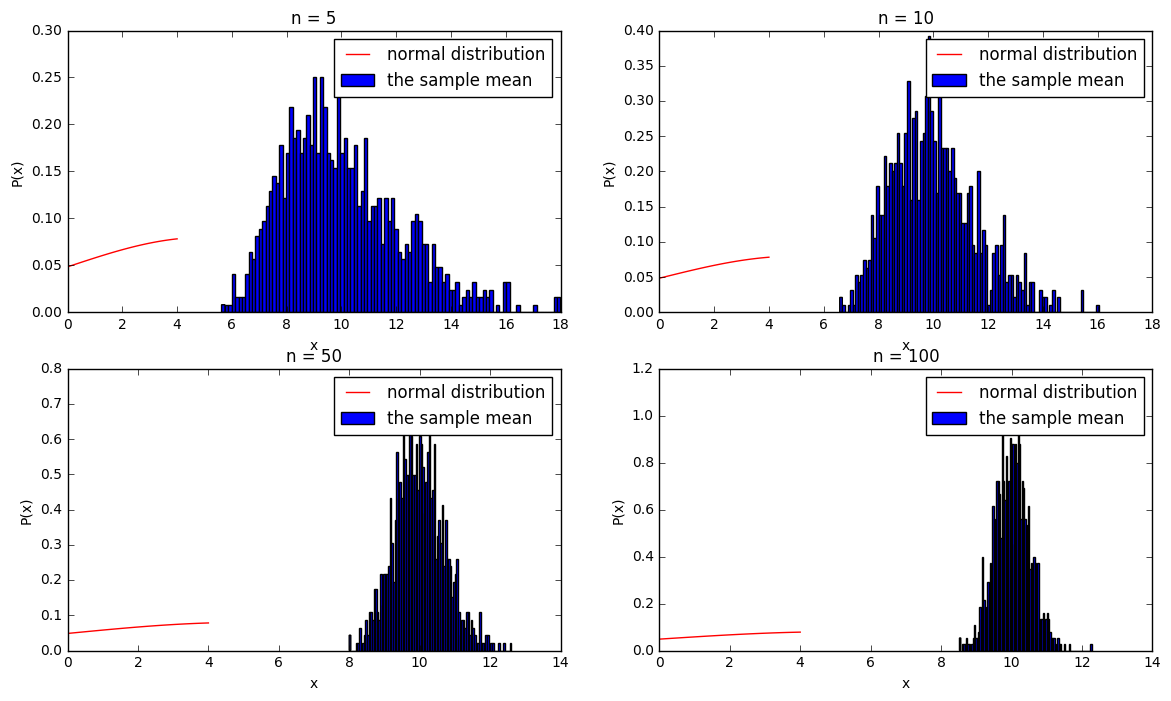

In [250]:
plt.figure(1, figsize = [14, 8])

plt.subplot(2,2,1)
plt.title("n = 5")
norm_pdf(1,1)
hist(five)
plt.legend(['normal distribution', 'the sample mean'])

plt.subplot(2,2,2)
norm_pdf(1,1)
plt.title("n = 10")
hist(ten)
plt.legend(['normal distribution', 'the sample mean'])


plt.subplot(2,2,3)
norm_pdf(1,1)
plt.title("n = 50")
hist(fifty)
plt.legend(['normal distribution', 'the sample mean'])


plt.subplot(2,2,4)
norm_pdf(1,1)
plt.title("n = 100")
hist(hundred)
plt.legend(['normal distribution', 'the sample mean'])



Центральная предельная теорема утверждает, что сумма nn независимых одинаково распределенных случайных величин имеет распределение, близкое к нормальному. Другими словами, закон распределения средней арифметической X¯nX¯n первых nn величин при увеличении nn приближается к нормальному распределению N(μ,σ2/n)N(μ,σ2/n).

при увеличении n закон распределения средних приближается к нормальному распределению (закон больших чисел)
Экспоненциальное распределение приближается к нормальному распределению при увеличении размера выборки. Однако на последних четырех графиках этого не происходит - видимо, у меня ошибка в вычислениях.